---
# PHY426 Practical 9/Assignment 4: Monte Carlo Methods
---

This assignment will be due at 1:00 pm EST on Tuesday March 23rd (just before the next lecture).

Your solution to each question will be graded for correctness as well as for the readability of your code (including comments, appropriate labels on figures, etc). 

**Total**:
/100

**NOTES** 
- PHY2710 students -- No need to re-do Q1-Q4, I have your solutions already. You can go directly to Q5.  
- PHY426 students -- Please copy your solutions to Q1-Q4 from Practical 8 here.    

# Question 1: Radioactive decay chain - from Practical 8

This exercise looks at a more advanced version of the simple radioactive decay simulation the example above.

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different
routes, with probabilities and half-lives thus:

![image.](decaychain.png)

(Technically, $^{209}$Bi isn't really stable, but it has a half-life of
more than $10^{19}$ years, a billion times the age of the universe, so it
might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi,
simulate the decay of the atoms as in the example above by dividing time into
slices of length $\delta t=1\,$s each and on each step doing the following:

* For each atom of $^{209}$Pb in turn, decide at random, with the  appropriate probability, whether it decays or not.  (The probability can
  be calculated from $p(t) = 1 - 2^{-t/\tau}$.)  Count the total number that decay,
  subtract it from the number of $^{209}$Pb atoms, and add it to the number
  of $^{209}$Bi atoms.
* Now do the same for $^{209}$Tl, except that decaying atoms are
  subtracted from the total for $^{209}$Tl and added to the total for
  $^{209}$Pb.
* For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi
  atom decays you have to decide at random with the appropriate probability
  the route by which it decays.  Count the numbers that decay by each route
  and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down
from the top, to avoid inadvertently making the same atom decay twice on a
single step.

Keep track of the number of atoms of each of the four isotopes at all times
for 20,000 seconds and make a single graph showing the four numbers as a
function of time on the same axes.

[10 points]

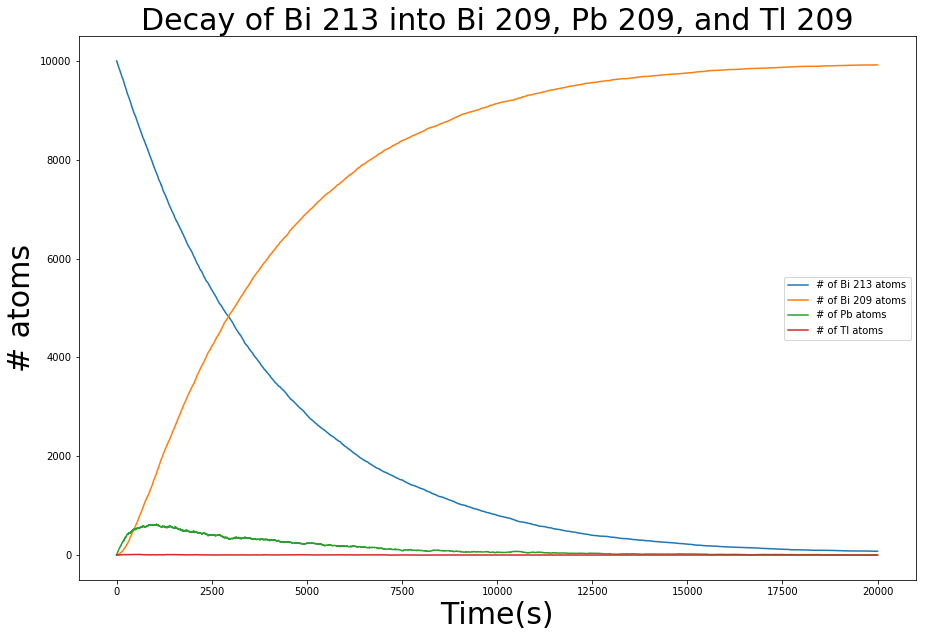

In [3]:
# Write your program (with comments!) here
# Write your program here

from random import random 
import numpy as np
import matplotlib.pyplot as plt


# Number of Pb_209, Bi_209, Tl_209, and Bi_213 atoms
NBi_213 = 10000
NBi_209 = 0
NPb = 0
NTl = 0


# Probablities of Bi_213 decaying to Pb_209
p_1 = 0.9791


# Half-lifes for 213_Bi, 209_Tl, 209_Pb
tau_Bi_213 = 46*60
tau_Pb = 3.3*60
tau_Tl = 2.2*60

# Define the time step h = 1s
h = 1.0

# Probability of Decay for Bi_213, Pb_209, Tl_209
p_Bi_213 = 1 -2**(-h/tau_Bi_213)
p_Pb = 1 -2**(-h/tau_Pb)
p_Tl = 1 -2**(-h/tau_Tl)

# Size of time step in seconds
h = 1.0

# Max time
tmax = 20000

# Plot time points
tpoints = np.arange(0.0, tmax, h)

# Where we will store the number of each type of atom for each time step, h
Bi_213_points = []
Bi_209_points = []
Pb_points = []
Tl_points = []


# Main loop simulating the decay
for t in tpoints:
    
    # Appending current number of atoms of each type
    Bi_213_points.append(NBi_213)
    Bi_209_points.append(NBi_209)
    Pb_points.append(NPb)
    Tl_points.append(NTl)
    
    # Store the number Pb atoms that decay
    Pb_decay = 0
    for i in range(NPb):
        
        # Each Pb atom has a probability p_Pb of decaying, which we add to 
        # our variable Pb_decay which keeps track of each Pb decay for each
        # time step
        if random()<p_Pb:
            Pb_decay += 1
    
    # Compute the number of atoms of Tl that decay into Pb
    Tl_decay = 0
    for i in range(NTl):
        if random()<p_Tl:
            Tl_decay += 1
            
    # Calculating the number of Bi_213 that decay into either Tl
    # or Pb. 
    Bi_213_decay = 0
    for i in range(NBi_213):
           
        # Each Bi_213 has a probability p_Bi_213 of decaying
        if random()<p_Bi_213:
            
            # We update our count of the total Bi_213_decay 
            Bi_213_decay += 1
            
            # Each decay has a p_1 chance of decaying into Pb 
            # and a 1 - p_1 chance of decaying into Tl. In either
            # case we add back to the respective totals of these atoms
            if random()<p_1:
                NPb += 1
            else:
                NTl += 1
     
    # Add up all the decays to each of the atom counts
    NTl = NTl - Tl_decay
    NPb = NPb - Pb_decay + Tl_decay
    NBi_209 = NBi_209 + Pb_decay
    NBi_213 -= Bi_213_decay

    
# Define the figure and axes objects with size 15x10
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Decay of Bi 213 into Bi 209, Pb 209, and Tl 209", fontsize=30)

# Plot the result
plt.plot(tpoints, Bi_213_points, label='# of Bi 213 atoms')
plt.plot(tpoints, Bi_209_points, label='# of Bi 209 atoms')
plt.plot(tpoints, Pb_points, label='# of Pb atoms')
plt.plot(tpoints, Tl_points, label='# of Tl atoms')

plt.legend()
plt.xlabel("Time(s)", fontsize=30)
plt.ylabel("# atoms", fontsize=30)
plt.show()


# Question 2: Using non-uniformly distributed random numbers - from Practical 8

Re-write the program from example 1 above, but this time using a faster method that draws random numbers from a non-uniform distribution.  

In the example above, we had *N* atoms of a radioisotope with a half-life $\tau$. We showed that the probability that a particular atom decays in time *t* is 

$p(t) = 1 - 2^{-t/\tau}$.

The total probability of a decay event occuring between times *t* and *t + dt* is:

$$P(t)dt = 2^{-t/\tau}\frac{\ln2}\tau dt$$

This is an example of a non-uniform probability distribution. Earlier decay times are more probable than late ones, but all possible times will occur with some non-zero probability.

Using the transformation method, generate 1000 random numbers from the nonuniform distribution of *P(t)* from the equation:

$$P(t)dt = 2^{-t/\tau}\frac{\ln2}\tau dt$$

to represent the times of decay of 1000 atoms of $^{208}$Tl
(which has half-life 3.053 minutes).  Then make a plot showing the number
of atoms that have not decayed as a function of time, i.e., a plot as a
function of *t* showing the number of atoms whose chosen decay times are
greater than *t*.

Hint: You may find it useful to know that the package `numpy` contains
a function `sort` that will rearrange the elements of an array
in increasing order.  That is, `b = sort(a)` returns a new
array `b` containing the same numbers as`a`, but rearranged in
order from smallest to largest.

[5 points]

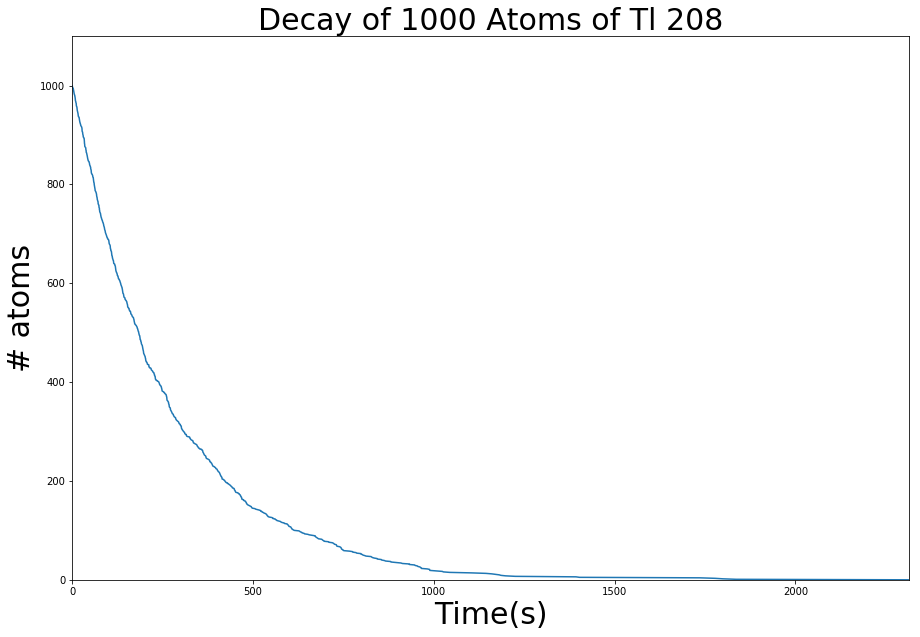

In [2]:
# Write your program (with comments!) here

from random import random 
import numpy as np
import matplotlib.pyplot as plt

# Set the constants
# Number of thallium and lead atoms
NTl = 1000

# Half life of thallium in seconds
tau = 3.053*60



# We want 1000 random points from 0 to 1 to insert
# into the expression for t to generate the times
# of decay for each of the 1000 atoms
z = np.random.uniform(size=1000)

# Using the transformation method we arrive at the 
# equation: -tau*log2(1-z) which generates the times
# of decays for each of the atoms of thallium
t_decay = -tau * np.log2(1 - z)

# The times of decay are unordered, so we use np.sort
# to arrange them chronologically 
t_decay = np.sort(t_decay)


# We create an array of integers descending from 1000
# which we use to represent the number of atoms left after
# i decays.
N = np.zeros(1000)
for i in range(999, -1, -1):
    N[999 - i] = i
    
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Decay of 1000 Atoms of Tl 208", fontsize=30)
plt.xlabel("Time(s)", fontsize=30)
plt.ylabel("# atoms", fontsize=30)

plt.xlim((0, t_decay[-1]))
plt.ylim((0, 1000 + 100))
plt.plot(t_decay, N)

# Question 3: Confined 2D random walk - from Practical 8

Brownian motion is the motion of a particle, such as a smoke or dust particle, in a gas, as it is buffeted by random collisions with gas molecules.  Make a simple computer simulation of such a particle in two dimensions as follows.  The particle is confined to a square grid or lattice $L\times L$ squares on a side, so that its position can be
represented by two integers $i,j = 0\ldots L-1$.  It starts in the middle of the grid.  In each step of the simulation, choose a random direction---up, down, left, or right---and move the particle one step in that direction.  This process is called a random walk.  The particle is not allowed to move outside the limits of the lattice---if it tries to do so, choose a new random direction to move in. (We choose an odd length for the side of the square so that
there is one lattice site exactly in the center.) 

Write a program to perform a million steps of this process on a lattice with $L=101$. Make an animation of the position of the particle -- choose a suitable number of frames. 

NOTE: You can use your earlier 2D random walk code, modifying it to sample finite 2D grid of points. You'll need this for the next exercise.

[10 points]

Elapsed time during walk generation in seconds:68.87395472824574




Found 100 files of the format *_movie.jpg.

Making HTML code for displaying 000_movie.jpg, 001_movie.jpg, 002_movie.jpg, 003_movie.jpg, 004_movie.jpg, 005_movie.jpg, 006_movie.jpg, 007_movie.jpg, 008_movie.jpg, 009_movie.jpg, 010_movie.jpg, 011_movie.jpg, 012_movie.jpg, 013_movie.jpg, 014_movie.jpg, 015_movie.jpg, 016_movie.jpg, 017_movie.jpg, 018_movie.jpg, 019_movie.jpg, 020_movie.jpg, 021_movie.jpg, 022_movie.jpg, 023_movie.jpg, 024_movie.jpg, 025_movie.jpg, 026_movie.jpg, 027_movie.jpg, 028_movie.jpg, 029_movie.jpg, 030_movie.jpg, 031_movie.jpg, 032_movie.jpg, 033_movie.jpg, 034_movie.jpg, 035_movie.jpg, 036_movie.jpg, 037_movie.jpg, 038_movie.jpg, 039_movie.jpg, 040_movie.jpg, 041_movie.jpg, 042_movie.jpg, 043_movie.jpg, 044_movie.jpg, 045_movie.jpg, 046_movie.jpg, 047_movie.jpg, 048_movie.jpg, 049_movie.jpg, 050_movie.jpg, 051_movie.jpg, 052_movie.jpg, 053_movie.jpg, 054_movie.jpg, 055_movie.jpg, 056_movie.jpg, 

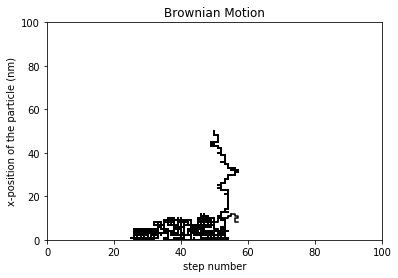

In [204]:
import numpy as np
import matplotlib.pyplot as plt
# The python script in the practical folder contains a function called movie
# that allows us to generate an html movie from a set of images -- 
from html_movie import movie 
from time import perf_counter

def new_step():
    '''
    randomly chooses a direction for a step in a walk.
    This is done by choosing a random number from 1 to 4
    where each integer refers to a specific direction in
    Brownian motion:
    
    1 - Left  (-1,0)
    2 - Right (1,0)
    3 - Up    (0,1)
    4 - Down  (0,-1)
    
    The function returns the tuple which is used to calculate
    the new step in generate_walk
    '''
    
    # Randomly choose a direction
    step = np.random.choice([1,2,3,4], p=(0.25,0.25, 0.25, 0.25))
    
    # Return leftwards step
    if step == 1:
        return (-1,0)
    
    # Return rightwards step
    elif step == 2:
        return (1,0)
    
    # Return upwards step
    elif step == 3:
        return (0,1)
    
    # Return downwards step
    else:
        return (0,-1)

def invalid_position(x, y, L):
    '''
    Considers a position (x,y) and a grid of [0,1,...,L-1]x[0,1,...,L-1]
    and returns true if the position (x,y) lies beyond this grid, otherwise
    it returns false
    '''
    
    if (x < 0 or x > L-1) or (y < 0 or y > L-1):
        return True
    else:
        return False

    
# Initiating our timer 
ta_start = perf_counter()  

##########################################################################################
# Generating Walk
##########################################################################################

# The number of steps in the random walk
nsteps = 1000000

# Size of grid
L = 101

# Generate N-1 steps for x, we assign 25% probability for left or right
# steps and 50% for the up and down for which we will assign a 0 in the
# array
x_steps = np.random.choice([-1,1,0], nsteps-1, p=(0.25,0.25, 0.5))
y_steps = np.zeros(nsteps-1)

# We store the locations of the zero x steps here that we will use to 
# generate the up and down steps
zero_x_steps = np.where(x_steps == 0)

# For each position in zero_x_steps we flip a coin to see if the y step
# is upwards or downwards
for pos in zero_x_steps:
    y_steps[pos] = np.random.choice([-1,1], p=(0.5, 0.5))

# Set up the position arrays for x and y
x = np.zeros(nsteps)
y = np.zeros(nsteps)

# Start at the middle of the graph. We must assume that 
# N is odd for there to be a middle of the graph
x[0] = (L-1)/2
y[0] = (L-1)/2

# We calculate the cumulative steps taken at position i for
# both the x and y positions
x[1:] = np.cumsum(x_steps) + (L-1)/2
y[1:] = np.cumsum(y_steps) + (L-1)/2

# We now check where x and y individually cross either the 0 or
# L-1 boundaries
invalid_x = np.where((x < 0) | (x > L-1))
invalid_y = np.where((y < 0) | (y > L-1))

# We then compile all the positions where the paths are invalid
# into a single array
invalid_positions = np.append(invalid_x[0], invalid_y[0])
invalid_positions = np.sort(invalid_positions)

# Go through each invalid position and redo the step taken
for pos in invalid_positions:
    # Randomly generate a new step useing new_step
    step = new_step()
    
    # Checking that the new step is actually valid
    valid = 0
    while not valid:
        # If the position after the new step is still invalid, we 
        # generate a new step
        if invalid_position(x[pos-1] + step[0],y[pos-1] + step[1], L):
            step = new_step()
            
        # Otherwise we exit the loop
        else:
            valid = 1
            
    # Finally, we set the new position
    x[pos] = x[pos-1] + step[0]
    y[pos] = y[pos-1] + step[1]
    
# Stopping our timer
ta_stop = perf_counter() 
print("Elapsed time during walk generation in seconds:" + str(ta_stop-ta_start) + '\n')

##########################################################################################
# Generating HTML Movie 
#
# Up to here we should have generate a perfectly valid brownian motion 
# with nsteps
##########################################################################################

# The number of frames in the movie
num_frames = 100

# The steps we are skipping between frames of the movie
steps_between_frames = 10

# This defines the file names for the frames of the movie.
# The frames are numbered in order starting with 000
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
# if you need to have more frames in your movie, you will need to modify this line
file_name = "{:03d}_movie.jpg"


for i in range(num_frames):
    # plot the x position up to the current x position
    # the time at the current frame of the movie is t = num_frames*steps_between_frames
    t = i*steps_between_frames
    
    # we slice the original array 
    current_x_position = x[0:t]
    current_y_position = y[0:t]
    
    # Create a plot of the particle's position up to the current time with title, axes labels
    plt.plot(current_x_position, current_y_position, c="k")
    plt.xlabel('step number')
    plt.ylabel('x-position of the particle (nm)')
    # We set the limits of this plot so all of the points will be displayed (so the axes don't change
    # during the movie)
    plt.xlim(0, L-1)
    plt.ylim(0, L-1)
    
    # Add a title to the plot
    plt.title('Brownian Motion')
    
    # Save the file in the format given above -- number followed by _movie.jpg
    plt.savefig(file_name.format(i)) 

# Use html movie encoder from scitools to create an HTML document that
# will display the frames as a movie. 
# You will be able to open the file movie.html in a Web browser to view it. 
# Use the controls to start the movie.
movie(input_files='*_movie.jpg', output_file='BrownianMotion_2D.html')

# Stopping our timer
ta_stop = perf_counter() 
print("Elapsed total time in seconds:" + str(ta_stop-ta_start) + '\n')


In [290]:
rm *movie.jpg

In [291]:
rm *html

# Question 4: Simulating diffusion-limited aggregation - from Practical 8

In the next exercise, we will use random numbers to simulate a more complex physical process: diffusion limited aggregation.

In this exercise you will develop a computer program to reproduce one of the most famous models in computational physics, diffusion-limited aggregation, or DLA for short.  There are various versions of DLA, but
the one we'll study is as follows.  You take a square grid with a single particle in the middle.  The particle performs a random walk from square to square on the grid until it reaches a point on the edge of the system, at
which point it "sticks" to the edge, becoming anchored there and immovable:

![image.](dla.png)

Then a second particle starts at the center and does a random walk until it sticks either to an edge or to the other particle.  Then a third particle starts, and so on.  Each particle starts at the center and walks until it
sticks either to an edge or to any anchored particle.

* Exercise 3 will serve as a starting point for your DLA program. Modify your program to perform the DLA process on a $101\times101$ lattice---we choose an odd length for the side of the square so that there is one lattice site exactly in the center.  Repeatedly introduce a new particle at the center and have it walk randomly until it sticks to an edge or an anchored particle.

* You will need to decide some things.  How are you going to store the
  positions of the anchored particles?  On each step of the random walk you
  will have to check the particle's neighboring squares to see if they are
  outside the edge of the system or are occupied by an anchored particle.
  How are you going to do this?  You should also modify your visualization
  code from the Brownian motion exercise to visualize the positions of both
  the randomly walking particles and the anchored particles.  Run your
  program for a while and observe what it does.

* In the interests of speed, change your program so that it shows only
  the anchored particles on the screen and not the randomly walking ones.
  That way you need update the pictures on the screen only when a new
  particle becomes anchored. 

* Set up the program so that it stops running once there is an anchored
  particle in the center of the grid, at the point where each particle
  starts its random walk.  Once there is a particle at this point, there's
  no point running any longer because any further particles added will be
  anchored the moment they start out.

* Run your program and see what it produces.  If you are feeling patient,
  try modifying it to use a $201\times201$ lattice and run it again---the
  pictures will be more impressive, but you'll have to wait longer to
  generate them.

* A nice further twist is to modify the program so that the anchored
  particles are shown in different shades or colors depending on their age,
  with the shades or colors changing gradually from the first particle
  added to the last.

[20 points]

In [ ]:
# Write your program (with comments!) here
import numpy as np
import matplotlib.pyplot as plt
# The python script in the practical folder contains a function called movie
# that allows us to generate an html movie from a set of images -- 
from html_movie import movie 
from time import perf_counter

def new_step():
    '''
    randomly chooses a direction for a step in a walk.
    This is done by choosing a random number from 1 to 4
    where each integer refers to a specific direction in
    Brownian motion:
    
    1 - Left  (-1,0)
    2 - Right (1,0)
    3 - Up    (0,1)
    4 - Down  (0,-1)
    
    The function returns the tuple which is used to calculate
    the new step in generate_walk
    '''
    
    # Randomly choose a direction
    step = np.random.choice([1,2,3,4], p=(0.25,0.25, 0.25, 0.25))
    
    # Return leftwards step
    if step == 1:
        return (-1,0)
    
    # Return rightwards step
    elif step == 2:
        return (1,0)
    
    # Return upwards step
    elif step == 3:
        return (0,1)
    
    # Return downwards step
    else:
        return (0,-1)
    
def invalid_position(x, y, L):
    '''
    Considers a position (x,y) and a grid of [0,1,...,L-1]x[0,1,...,L-1]
    and returns true if the position (x,y) lies beyond this grid, otherwise
    it returns false
    '''
    
    if (x < 0 or x > L-1) or (y < 0 or y > L-1):
        return True
    else:
        return False
    
def next_to_anchored_particle(x, y, anchored_particles):
    '''
    If the distance bewteen the x and y positions are touching 
    any of the anchored particles, we return true otherwise 
    we return false
    '''
    
    for point in anchored_particles:
        
        # Calculate the radial distance of (x,y) to the 
        # anchored particles
        r = (x - point[0])**2 + (y - point[1])**2
        
        # Return true if the distance is less than sqrt(2)
        if np.sqrt(r) <= np.sqrt(2):
            return True
        else:
            return False


def generate_DLA_walk(L, anchored_particles):
    
    # We start at an initial position in the middle of the graph
    initial_position= ((L-1)/2, (L-1)/2)
    
    # We start generating our walk by creating a list of points
    walk = []
    
    # We append the initial position
    walk.append(initial_position)
    
    # We store achor points in these variables
    anchor_x = 0
    anchor_y = 0
    
    
    # We want to run up until the particle hits a wall or another 
    # particle.
    running = True
    while running:
        
        # Randomly generate a new step
        step = new_step()
        
        # Calculate the new x and y positions of the walk
        new_x = walk[-1][0]+step[0]
        new_y = walk[-1][1]+step[1]
        
        
        # If the new position is next to an anchored point we interrupt 
        # our loop and set the new anchorpoints to the new x and y coordinates
        if next_to_anchored_particle(new_x, new_y, anchored_particles):
            anchor_x = new_x
            anchor_y = new_y
            
            running = False
           
        # Otherwise, if the position is invalid, we must also also interupt the 
        # loop however this time the new anchor points are just the coordinates
        # before new_x and new_y
        if invalid_position(new_x, new_y, L):
            anchor_x = walk[-1][0]
            anchor_y = walk[-1][1]
            
            running = False
        
        # If new step is not invalid, we append these new coordinates to continue
        # with the loop
        walk.append((new_x, new_y))
    
    # We return the total walk and the coordinates of the anchor point    
    return walk, (anchor_x, anchor_y)
                                                    

##########################################################################################
# Generating HTML Movie 
#
# Up to here we should have generate a perfectly valid brownian motion 
# with nsteps
##########################################################################################

# The number of steps in the random walk
nsteps = 100000

# Size of grid
L = 11

# The number of frames in the movie
num_frames = 100

# The steps we are skipping between frames of the movie
steps_between_frames = 10

# This defines the file names for the frames of the movie.
# The frames are numbered in order starting with 000
# {:03d} will display integers with three digits and insert zeros if needed:
# '000_movie.jpg', '001_movie.jpg', etc.
# if you need to have more frames in your movie, you will need to modify this line
file_name = "{:03d}_movie.jpg"
anchored_particles = []

i = 0
k = 0

while ((L-1)/2, (L-1)/2) not in anchored_particles:
    
    walk, anchor = generate_DLA_walk(L, anchored_particles)
    walk = np.array(walk)
    anchored_particles.append(anchor)
    
    plt.clf()
    print("Calculating " + str(i) +'th walk')
    for j in np.arange(0,walk.size, 1000):
        
        # Keep up count for file naming purposes
        k+= 1
        
        # we slice the original array 
        current_x_position = walk[:j,0]
        current_y_position = walk[:j,1]
        
        anchors = np.array(anchored_particles)
        # Create a plot of the particle's position up to the current time with title, axes labels
        plt.plot(current_x_position,current_y_position, 'r')
        plt.plot(anchors[:,0],anchors[:,1], '.')
        plt.xlabel('x-position of the particle')
        plt.ylabel('y-position of the particle (nm)')
        
        # We set the limits of this plot so all of the points will be displayed (so the axes don't change
        # during the movie)
        plt.xlim(0, L-1)
        plt.ylim(0, L-1)
        
        # Add a title to the plot
        plt.title('DLA')
        
        # Save the file in the format given above -- number followed by _movie.jpg
        plt.savefig(file_name.format(k)) 
    
    i+=1
        
# Use html movie encoder from scitools to create an HTML document that
# will display the frames as a movie. 
# You will be able to open the file movie.html in a Web browser to view it. 
# Use the controls to start the movie.
movie(input_files='*_movie.jpg', output_file='DLA_2D.html')


Calculating 0th walk
Calculating 1th walk
Calculating 2th walk
Calculating 3th walk
Calculating 4th walk
Calculating 5th walk
Calculating 6th walk
Calculating 7th walk
Calculating 8th walk
Calculating 9th walk
Calculating 10th walk
Calculating 11th walk
Calculating 12th walk
Calculating 13th walk
Calculating 14th walk
Calculating 15th walk
Calculating 16th walk
Calculating 17th walk
Calculating 18th walk
Calculating 19th walk
Calculating 20th walk
Calculating 21th walk
Calculating 22th walk
Calculating 23th walk
Calculating 24th walk


In [37]:
rm *movie.jpg

In [38]:
rm *html

rm: cannot remove ‘*html’: No such file or directory


---
# Question 5: Volume of a Hypersphere - from Lecture 9
---

[Problem 10.7 of Newman]

This exercise asks you to estimate the volume of a sphere of unit radius in ten dimensions using a Monte Carlo
method.  Consider the equivalent problem in two dimensions, the area of a circle of unit radius: 
![fig from Newman](circle.eps)
The area of the circle, the shaded area above, is given by the integral

$I = \iint_{-1}^{+1} f(x,y) \>dx\,dy,$

where $f(x,y)=1$ everywhere inside the circle and zero everywhere outside.
In other words,

$f(x,y) = \biggl\lbrace\begin{array}{ll}
           1 &\qquad\mbox{if $x^2+y^2\le1$,} \\
           0 &\qquad\mbox{otherwise.}
         \end{array}$

So if we didn't already know the area of the circle, we could calculate it
by Monte Carlo integration.  We would generate a set of $N$ random points
$(x,y)$, where both $x$ and $y$ are in the range from $-1$ to 1.  Then the
two-dimensional version of Eq. (10.33) for this calculation would be

$I \simeq {4\over N} \sum_{i=1}^N f(x_i,y_i).$

Generalize this method to the ten-dimensional case and write a program to
perform a Monte Carlo calculation of the volume of a sphere of unit radius
in ten dimensions.

If we had to do a ten-dimensional integral the traditional way, it would
take a very long time.  Even with only 100 points along each axis (which
wouldn't give a very accurate result) we'd still have $100^{10} = 10^{20}$
points to sample, which is impossible on any computer.  But using the Monte
Carlo method we can get a pretty good result with a million points or so.

[15 points]


In [20]:
# Write your program (with comments!) here
import numpy as np
import matplotlib.pyplot as plt
import math
from time import perf_counter


def in_circle(x, y):
    '''
    input: float, float
    output: bool
    
    The x and y coordinates of a point within a 2x2 grid is 
    given as input. If the position of this point falls 
    within the area of the circle of radius 1 centred in 
    this grid, then we return True otherwise False.
    '''
    
    # Calculate the size of its radial distance from the
    # origin.
    r = np.sqrt(x**2 + y**2)
    
    # If that radius is larger than the radius of the
    # circle then we return false, otherwise we return 
    # true.
    if r < 1.0 or math.isclose(r, 1.0, rel_tol=1e-10):
        return True
    else:
        return False
    
    
def in_circle_10D(x):
    '''
    input: np.array of floats
    output: bool
    
    The array x contains n float values. The radius is 
    calculated using the euclidean distance from the origin.
    If the radius is less than or close to 1, then the 
    function returns true, otherwise it returns false
    '''
    
    # Calculate the size of its radial distance from the
    # origin.
    r = 0
    
    for i in range(10):
        r += x[i]**2
    
    r = np.sqrt(r)
    
    # If that radius is larger than the radius of the
    # circle then we return false, otherwise we return 
    # true.
    if r < 1.0 or math.isclose(r, 1.0, rel_tol=1e-10):
        return True
    else:
        return False
    
    
#######################################################################
# Calculating the area of a circle
#######################################################################

# The number of samples of a a grid from x = [-1,1] and y = [-1,1]
N = 1000000

# Creating our array of samples from our grid of points
x = 2.0 * np.random.ranf((N,2)) - 1.0

# Set our integral to 0
I = 0

# For each random point, we determine if it is within the sphere
for i in range(N):
    
    if in_circle(x[i,0], x[i,1]):
        
        # We add one to our sum for every point within the sphere
        I+=1

# We apply the proper scaling to I to get the value for the integral
I = (4.0*I)/N

# The real expected value
real_value = np.pi

# The error in our approximation using MC
error = 100 * abs((I - real_value) / real_value)
print("Area of unit circle calculated using mean value MC: ", I, "with percentage error, ", error)

#######################################################################
# Calculating the area of a ten dimensional circle
#######################################################################


# The number of samples of a a grid from x_i = [-1,1] for 
# i = 0,1,2,...,9
N = 1000000

# Creating our array of samples from our grid of points
x = 2.0 * np.random.ranf((N,10)) - 1.0

# For each random point, we determine if it is within the sphere
I = 0


for i in range(N):
    if in_circle_10D(x[i]):
        
        # We add one to our sum for every point within the sphere
        I+=1
    
    
# The scaling reflects the volume of the 10 dimensional cube over
# which we have integrated over. Essentially multiplying by 2 for 
# every integration over x_1, x_2, ... ,x_10 in a mathematical 
# sense.
I = ((2**10)*I)/N

# The real expected value
real_value = (np.pi**5/120)

# The error in our approximation using MC
error = 100 * abs((I - real_value) / real_value)

print("Volume of unit 10-D circle calculated using mean value MC: ", I, "with percentage error, ", error)



Area of unit circle calculated using mean value MC:  3.14084 with percentage error,  0.023957707850291467
Volume of unit 10-D circle calculated using mean value MC:  2.57024 with percentage error,  0.7872419110584193


---
# Question 6: The Ising Model
---[Problem 10.9 of Newman]The Ising model is a theoretical
model of a magnet.  The magnetization of a magnetic material is made up of
the combination of many small magnetic dipoles spread throughout the
material.  If these dipoles point in random directions then the overall
magnetization of the system will be close to zero, but if they line up so
that all or most of them point in the same direction then the system can
acquire a macroscopic magnetic moment---it becomes magnetized.  The Ising
model is a model of this process in which the individual moments are
represented by dipoles or spins arranged on a grid or lattice:![fig from Newman](spins.eps)In this case we are using a square lattice in two dimensions, although the
model can be defined in principle for any lattice in any number of
dimensions.The spins themselves, in this simple model, are restricted to point in only
two directions, up and down.  Mathematically the spins are represented by
variables $s_i=\pm1$ on the points of the lattice, $+1$ for up-pointing
spins and $-1$ for down-pointing ones.  Dipoles in real magnets can
typically point in any spatial direction, not just up or down, but the
Ising model, with its restriction to just the two directions, captures a
lot of the important physics while being significantly simpler to
understand.Another important feature of many magnetic materials is that the individual
dipoles in the material may interact magnetically in such a way that it is
energetically favorable for them to line up in the same direction.  The
magnetic potential energy due to the interaction of two dipoles is
proportional to their dot product, but in the Ising model this simplifies
to just the product $s_is_j$ for spins on sites $i$ and $j$ of the lattice,
since the spins are one-dimensional scalars, not vectors.  Then the actual
energy of interaction is $-Js_is_j$, where $J$ is a positive interaction
constant.  The minus sign ensures that the interactions are ferromagnetic, meaning the energy is lower when dipoles are
lined up.  A ferromagnetic interaction implies that the material will
magnetize if given the chance.  (In some materials the interaction has the
opposite sign so that the dipoles prefer to be antialigned.  Such a
material is said to be  antiferromagnetic , but we will not
look at the antiferromagnetic case here.Normally it is assumed that spins interact only with those that are
immediately adjacent to them on the lattice, which gives a total energy for
the entire system equal to$E = -J \sum_{ij} s_i s_j\,,$where the notation $\sum_{ij}$ indicates a sum over pairs $i,j$ that are
adjacent on the lattice.  On the square lattice we use in this exercise
each spin has four adjacent neighbors with which it interacts.Write a program to perform a Markov chain Monte Carlo simulation of
the Ising model on the square lattice for a system of $20\times20$ spins.
You will need to set up variables to hold the value $\pm1$ of the spin on
each lattice site, probably using a two-dimensional integer array, and then
take the following steps. - First write a function to calculate the total energy of the system,
  as given by the equation above.  That is, for a given array of values of
  the spins, go through every pair of adjacent spins and add up the
  contributions $s_is_j$ from all of them, then multiply by $-J$.  Hint 1:
  Each unique pair of adjacent spins crops up only once in the sum.  Thus
  there is a term $-Js_1 s_2$ if spins 1 and 2 are adjacent to one another,
  but you do not also need a term $-Js_2 s_1$.  Hint 2: To make your final
  program to run in a reasonable amount of time, you will find it helpful
  if you can work out a way to calculate the energy using Python's ability
  to do arithmetic with entire arrays at once.  If you do the calculation
  step by step, your program will be significantly slower.
 - Now use your function as the basis for a Metropolis-style simulation
  of the Ising model with $J=1$ and temperature $T=1$ in units where the
  Boltzmann constant $k_B$ is also $1$.  Initially set the spin variables
  randomly to $\pm1$, so that on average about a half of them are up and a
  half down, giving a total magnetization of roughly zero.  Then choose a
  spin at random, flip it, and calculate the new energy after it is
  flipped, and hence also the change in energy as a result of the flip.
  Then decide whether to accept the flip using the Metropolis acceptance
  formula, Eq. (10.60).  If the move is rejected you will have to flip the
  spin back to where it was.  Otherwise you keep the flipped spin.  Now
  repeat this process for many moves.
 - Make a plot of the total magnetization $M=\sum_i s_i$ of the system
  as a function of time for a million Monte Carlo steps.  You should see
  that the system develops a ``spontaneous magnetization,'' a nonzero value
  of the overall magnetization.  Hint: While you are working on your
  program, do shorter runs, of maybe ten thousand steps at a time.  Once
  you have it working properly, do a longer run of a million steps to get
  the final results.
 - Run your program several times and observe the sign of the
  magnetization that develops, positive or negative.  Describe what you
  find and give a brief explanation of what is happening.  [40 points]

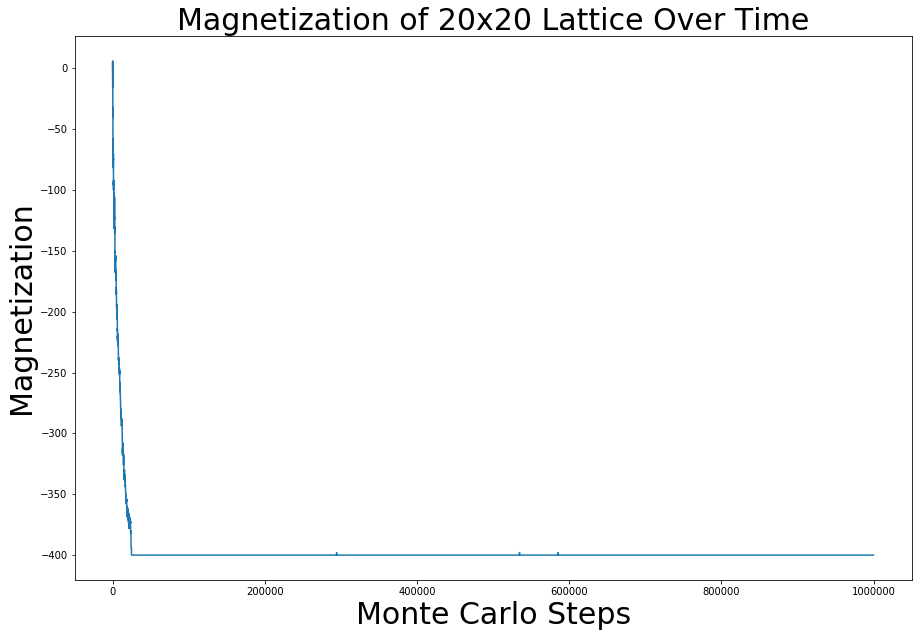

In [176]:
# Write your program (with comments!) here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal


##############################################################################
# Set up spin matrix and Energy 
##############################################################################

# Use np.random.choice which fills each entry with either a +1 or -1 with 
# equal probability over a 20x20 lattice
s = np.random.choice([-1,1],(20,20))

# Set up the matrix that represent adjacent spins we want to add up together
# Note: the central value is 0 representing the spin we are calculating the
# sum of adjacent spins for
adjacent = np.array([[0,1,0], [1,0,1], [0,1,0]])

# Calculates the sum of adjacent spins for each index of the matrix s
E = scipy.signal.convolve2d(s, adjacent, mode='same')

# Multiply each index by s_ij
E = E * s

# We now sum over the whole matrix to get the total energy and multiply by -1
E = -1 * np.sum(E)


##############################################################################
# Metropolis algorithm
##############################################################################
nsteps = 1000000

# Set up the value of the magnetization over time
magnetization = np.zeros(nsteps)

# We set up the initial magnetization value
magnetization[0] = np.sum(s)

# Time variable for nsteps units of time
time = np.arange(0, nsteps, 1)


# For the next nsteps-1 iterations we randomly flip
# a spin and calculate the energy and 
for i in range(1, nsteps):
    
    # Copy original matrix
    s_1 = s.copy()
    # ^^^^^ 1 hour of debugging work
    # If I remember correctly, python always assigns by reference and not 
    # value. This means that if assigned by s_1 = s, any change in s_1 
    # also affects s as well. s.copy() ensures that s_1 cannot modify
    # the base variable s
    
    # Randomly select a coordinate to flip the spin in s
    j = np.random.choice(np.arange(0,20,1))
    k = np.random.choice(np.arange(0,20,1))
    
    
    # Flip the sign of the spin
    s_1[j,k] = -1 * s_1[j,k]
    
    # Calculate the sum of adjacent spins for the new spin matrix
    E_1 = scipy.signal.convolve2d(s_1, adjacent, mode='same')
    
    # Multiply each index by s_ij
    E_1 = E_1 * s_1
    
    # We now sum over the whole matrix to get the total energy and multiply by -1
    E_1 = -1 * np.sum(E_1)
    
    # Decide to keep change or revert back to original matrix according to 
    # acceptance probability
    dE = E_1-E
    
    # Keep change to spin matrix and energy according to acceptance probability
    if(np.random.random() < np.exp(-dE)):
        # Keep the change
        s = s_1.copy()
        E = E_1
       
    # Store new magnetization
    magnetization[i] = np.sum(s)
    
fig, ax = plt.subplots(figsize=(15.0,10.0))
plt.title("Magnetization of 20x20 Lattice Over Time", fontsize=30)
plt.xlabel("Monte Carlo Steps", fontsize=30)
plt.ylabel("Magnetization", fontsize=30)
plt.plot(time, magnetization)


Magnetization quickly either trends to towards fully positive or negative magnetization depending on the initial few thousand steps in the metropolis simulation where the initial polarity starts to develop. In a majority of the simulations nearly the full lattice are alligned in the same direction. In a minority of cases the proportion of alligned to unalligned is less, but still non-zero. This evolution occurs because, beyond a certain point, exp(-dE) becomes so small that any change in the spin lattice is nearly improbable. 